# Bonus

The dataset you used in Challenge 1 and 2, was in fact an engineered version of a [public NBA dataset available on Kaggle](https://www.kaggle.com/datasets/visalakshiiyer/nba-match-data) 🏀

🎯 Investigate the full feature set, do an exploratory data analysis, experiment with other features and approaches to improve your ability to predict a player's *Win Above Replacement* rating.

⚠️ Don't forget to diagnose model performance along the way.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'data/historical_RAPTOR_by_player.csv'
historical_raptor_player_data = pd.read_csv(file_path)
historical_raptor_player_data.head()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922


In [17]:
# Basic information about the dataset
print(historical_raptor_player_data.info())

# Summary statistics
print(historical_raptor_player_data.describe())

# Check for missing values
print(historical_raptor_player_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18553 entries, 0 to 18552
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       18553 non-null  object 
 1   player_id         18553 non-null  object 
 2   season            18553 non-null  int64  
 3   poss              18553 non-null  int64  
 4   mp                18553 non-null  int64  
 5   raptor_offense    18553 non-null  float64
 6   raptor_defense    18553 non-null  float64
 7   raptor_total      18553 non-null  float64
 8   war_total         18553 non-null  float64
 9   war_reg_season    18553 non-null  float64
 10  war_playoffs      18553 non-null  float64
 11  predator_offense  18553 non-null  float64
 12  predator_defense  18553 non-null  float64
 13  predator_total    18553 non-null  float64
 14  pace_impact       18552 non-null  float64
dtypes: float64(10), int64(3), object(2)
memory usage: 2.1+ MB
None
             season     

In [18]:
features = ['poss', 'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'predator_offense', 'predator_defense', 'predator_total', 'pace_impact']
X = historical_raptor_player_data[features]
y = historical_raptor_player_data['war_total']

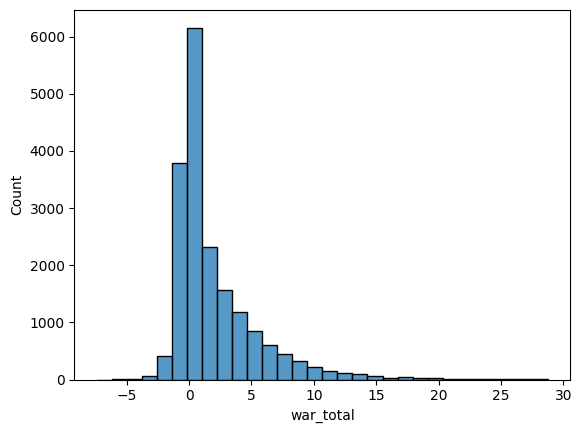

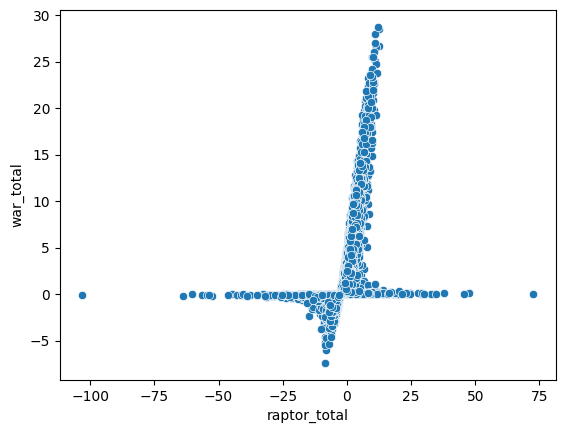

In [19]:
# Histogram of the target variable 'war_total'
sns.histplot(historical_raptor_player_data['war_total'], bins=30)
plt.show()

# Scatter plot of 'raptor_total' vs 'war_total'
sns.scatterplot(x=historical_raptor_player_data['raptor_total'], y=historical_raptor_player_data['war_total'])
plt.show()

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and the RandomForestRegressor
model = make_pipeline(imputer, RandomForestRegressor())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.011049024867120165


In [24]:
# Drop rows with NaN values in the dataset
X_clean = X.dropna()
y_clean = y[X_clean.index]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

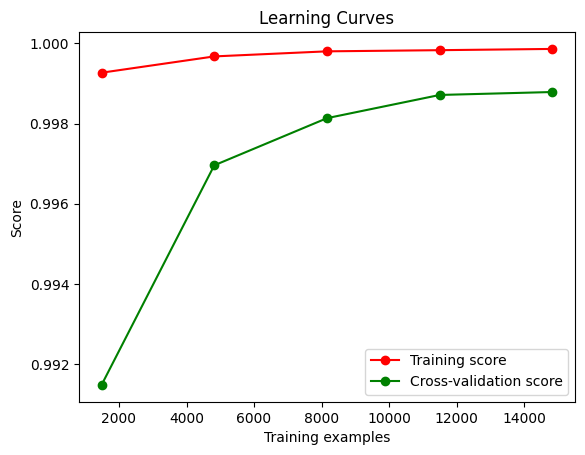

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# training
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# 
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Mean Squared Error (Gradient Boosting): {gb_mse}")

Mean Squared Error (Gradient Boosting): 0.07625198478905215


# 🏁